## Setup

In [351]:
# Import Library

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor


DATA_DIR = "data"
SUBMISSION_DIR = "submission"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_PATH = os.path.join(DATA_DIR, "test_case.csv")
SUBMISSION_PATH = os.path.join(DATA_DIR, "sample_submission.csv")
TARGET = "apparent_temperature (°C)"

"""
Change filename up to your preference
"""
SUBMISSION_NAME = "submission_1.csv" 
SUBMISSION_FILE = os.path.join(SUBMISSION_DIR, SUBMISSION_NAME)

In [352]:
# Load Data

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
submission = pd.read_csv(SUBMISSION_PATH)

## Exploratory Data Analysis

In [353]:
# Data Exploration
""" 
you can fill this section with your code for data exploration
"""
# Example
train.sample(10)

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city,id
81081,2021-03-27T05:00,16.2,100.0,16.2,18.7,1010.5,877.0,0.0,100.0,60.0,...,18.1,19.3,19.8,19.9,0.405,0.420,0.417,0.395,b,218789
117413,2019-09-29T23:00,10.4,97.0,10.0,9.9,1019.1,743.7,0.0,39.0,23.0,...,12.5,14.7,15.3,15.7,0.318,0.336,0.296,0.368,t,238007
74451,2021-07-30T02:00,17.3,94.0,16.3,17.1,1014.7,880.4,0.0,44.0,6.0,...,19.0,20.6,20.5,20.2,0.333,0.311,0.346,0.412,b,221786
219736,2018-08-14T05:00,24.7,85.0,22.1,28.4,1013.7,990.3,0.0,2.0,2.0,...,21.7,25.1,25.6,25.8,0.088,0.093,0.129,0.231,si,37037
138353,2018-11-26T15:00,27.1,81.0,23.5,34.8,1010.2,1012.5,0.0,100.0,65.0,...,29.7,29.6,30.8,31.2,0.306,0.232,0.079,0.188,su,7911
152284,2019-12-17T02:00,26.0,98.0,25.6,31.7,1010.3,992.9,0.0,100.0,87.0,...,22.7,24.0,24.8,25.2,0.462,0.448,0.454,0.406,le,112226
86002,2018-04-30T20:00,12.2,99.0,12.1,12.1,1019.9,745.9,0.0,100.0,93.0,...,14.8,16.8,16.7,16.5,0.343,0.339,0.341,0.363,t,225596
61580,2019-11-14T04:00,26.1,84.0,23.1,33.9,1010.2,1012.5,0.0,62.0,6.0,...,27.2,32.1,32.2,31.1,0.085,0.062,0.067,0.192,su,16372
106993,2020-09-06T01:00,25.4,93.0,24.1,30.4,1007.8,1007.3,0.0,59.0,15.0,...,26.4,26.7,26.8,26.8,0.392,0.389,0.385,0.383,p,150337
88735,2020-12-01T18:00,26.3,91.0,24.7,32.4,1008.6,1008.1,0.0,63.0,17.0,...,27.9,27.7,27.0,27.0,0.404,0.393,0.396,0.394,p,152418


In [354]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238644 entries, 0 to 238643
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                238644 non-null  object 
 1   temperature_2m (°C)                 238525 non-null  float64
 2   relativehumidity_2m (%)             238525 non-null  float64
 3   dewpoint_2m (°C)                    238525 non-null  float64
 4   apparent_temperature (°C)           238525 non-null  float64
 5   pressure_msl (hPa)                  238525 non-null  float64
 6   surface_pressure (hPa)              238525 non-null  float64
 7   snowfall (cm)                       238525 non-null  float64
 8   cloudcover (%)                      238525 non-null  float64
 9   cloudcover_low (%)                  238525 non-null  float64
 10  cloudcover_mid (%)                  238525 non-null  float64
 11  cloudcover_high (%)       

In [355]:
train.isnull().sum()

time                                    0
temperature_2m (°C)                   119
relativehumidity_2m (%)               119
dewpoint_2m (°C)                      119
apparent_temperature (°C)             119
pressure_msl (hPa)                    119
surface_pressure (hPa)                119
snowfall (cm)                         119
cloudcover (%)                        119
cloudcover_low (%)                    119
cloudcover_mid (%)                    119
cloudcover_high (%)                   119
shortwave_radiation (W/m²)            119
direct_radiation (W/m²)               119
diffuse_radiation (W/m²)              119
direct_normal_irradiance (W/m²)       112
windspeed_10m (km/h)                  119
windspeed_100m (km/h)                 119
winddirection_10m (°)                 451
winddirection_100m (°)                260
windgusts_10m (km/h)                  119
et0_fao_evapotranspiration (mm)       119
vapor_pressure_deficit (kPa)          119
soil_temperature_0_to_7cm (°C)    

In [356]:
train.isna().sum()

time                                    0
temperature_2m (°C)                   119
relativehumidity_2m (%)               119
dewpoint_2m (°C)                      119
apparent_temperature (°C)             119
pressure_msl (hPa)                    119
surface_pressure (hPa)                119
snowfall (cm)                         119
cloudcover (%)                        119
cloudcover_low (%)                    119
cloudcover_mid (%)                    119
cloudcover_high (%)                   119
shortwave_radiation (W/m²)            119
direct_radiation (W/m²)               119
diffuse_radiation (W/m²)              119
direct_normal_irradiance (W/m²)       112
windspeed_10m (km/h)                  119
windspeed_100m (km/h)                 119
winddirection_10m (°)                 451
winddirection_100m (°)                260
windgusts_10m (km/h)                  119
et0_fao_evapotranspiration (mm)       119
vapor_pressure_deficit (kPa)          119
soil_temperature_0_to_7cm (°C)    

In [357]:
train.nunique()

time                                   33336
temperature_2m (°C)                      284
relativehumidity_2m (%)                   80
dewpoint_2m (°C)                         226
apparent_temperature (°C)                378
pressure_msl (hPa)                       197
surface_pressure (hPa)                   599
snowfall (cm)                              1
cloudcover (%)                           101
cloudcover_low (%)                       101
cloudcover_mid (%)                       101
cloudcover_high (%)                      101
shortwave_radiation (W/m²)              1068
direct_radiation (W/m²)                  950
diffuse_radiation (W/m²)                 464
direct_normal_irradiance (W/m²)         9374
windspeed_10m (km/h)                     293
windspeed_100m (km/h)                    369
winddirection_10m (°)                    360
winddirection_100m (°)                   360
windgusts_10m (km/h)                     172
et0_fao_evapotranspiration (mm)           98
vapor_pres

In [358]:
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
num_cols = train.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['time', 'city']
Numerical Variables:
['temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'apparent_temperature (°C)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'snowfall (cm)', 'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)', 'windspeed_10m (km/h)', 'windspeed_100m (km/h)', 'winddirection_10m (°)', 'winddirection_100m (°)', 'windgusts_10m (km/h)', 'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)', 'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)', 'id']


In [359]:
for col in cat_cols:
    print(f"{col}")
    print(f"{train[col].unique()[:20].tolist()}\n\n")

time
['2018-06-01T09:00', '2020-03-15T04:00', '2021-03-11T11:00', '2018-06-29T01:00', '2019-03-31T03:00', '2019-04-23T06:00', '2018-01-31T16:00', '2018-09-21T13:00', '2020-08-16T07:00', '2018-12-21T14:00', '2019-03-13T13:00', '2018-08-28T13:00', '2019-06-30T03:00', '2019-09-28T10:00', '2020-01-08T15:00', '2018-02-01T19:00', '2018-03-18T04:00', '2020-06-15T23:00', '2018-11-19T07:00', '2018-01-06T12:00']


city
['p', 'lh', 'u', 't', 'si', 'le', 'su', 'b']




temperature_2m (°C)
Skew : -1.25


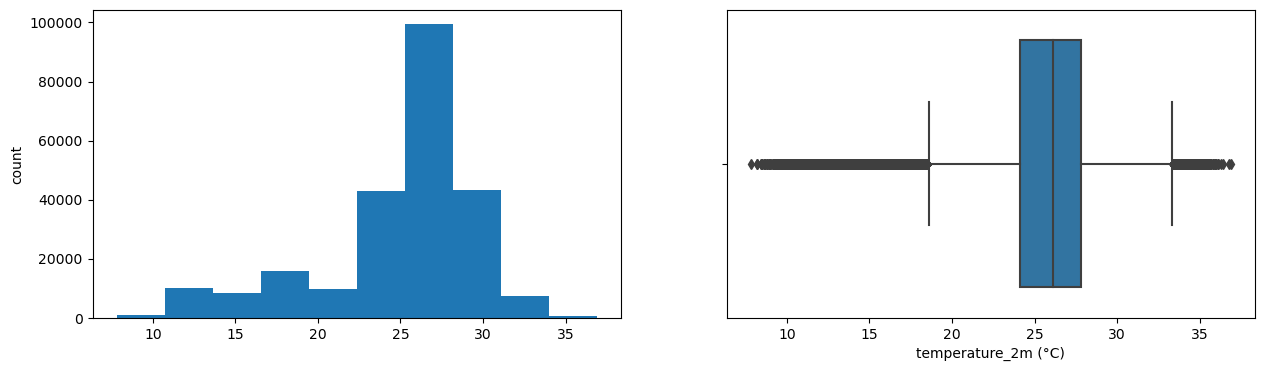

relativehumidity_2m (%)
Skew : -1.45


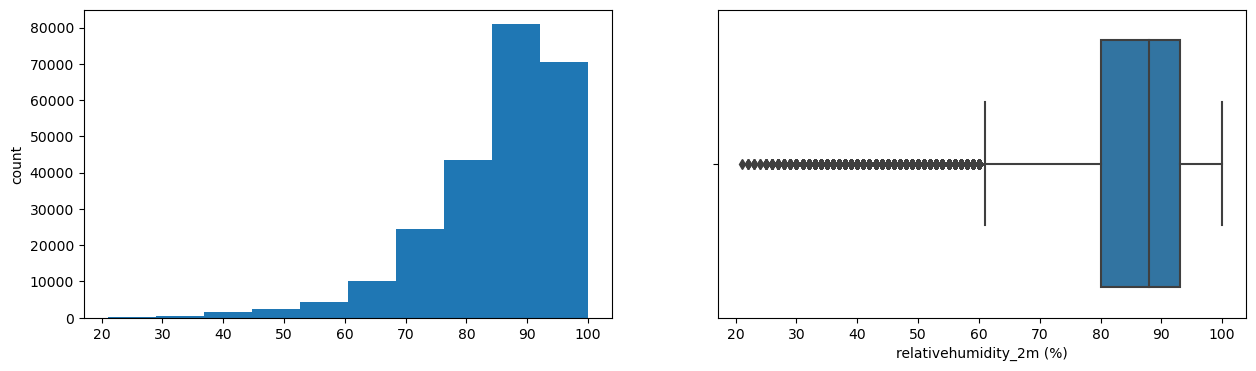

dewpoint_2m (°C)
Skew : -1.48


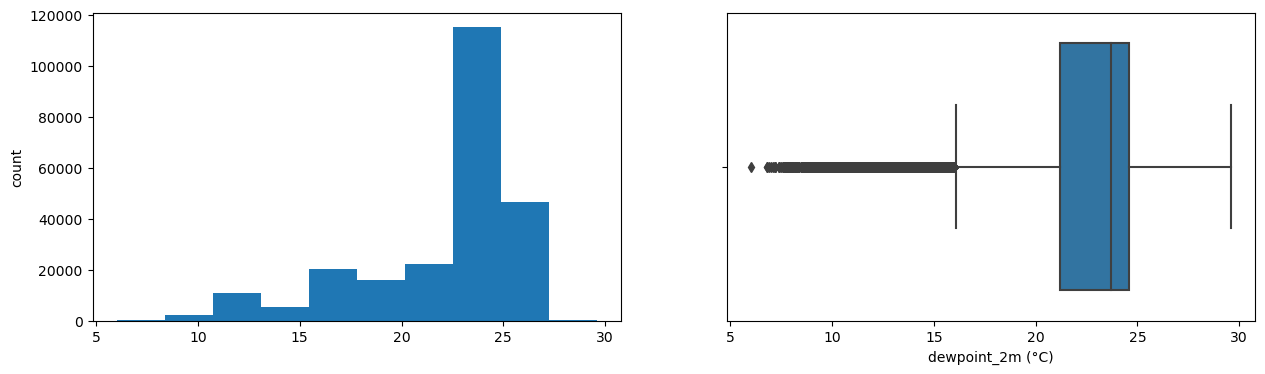

apparent_temperature (°C)
Skew : -1.29


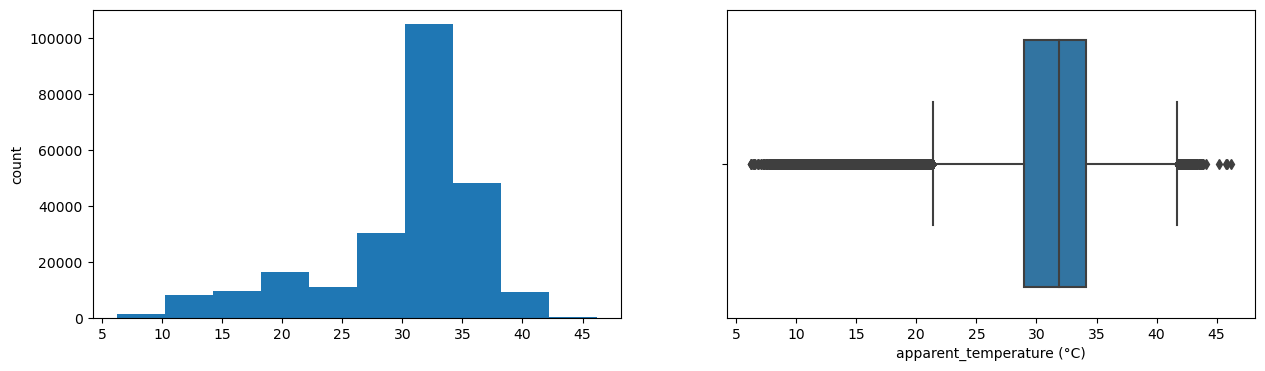

pressure_msl (hPa)
Skew : 0.6


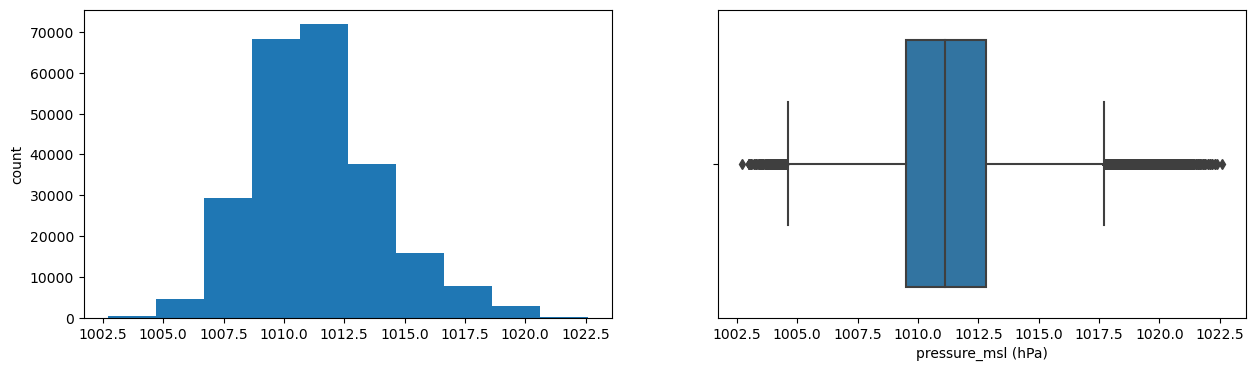

surface_pressure (hPa)
Skew : -2.03


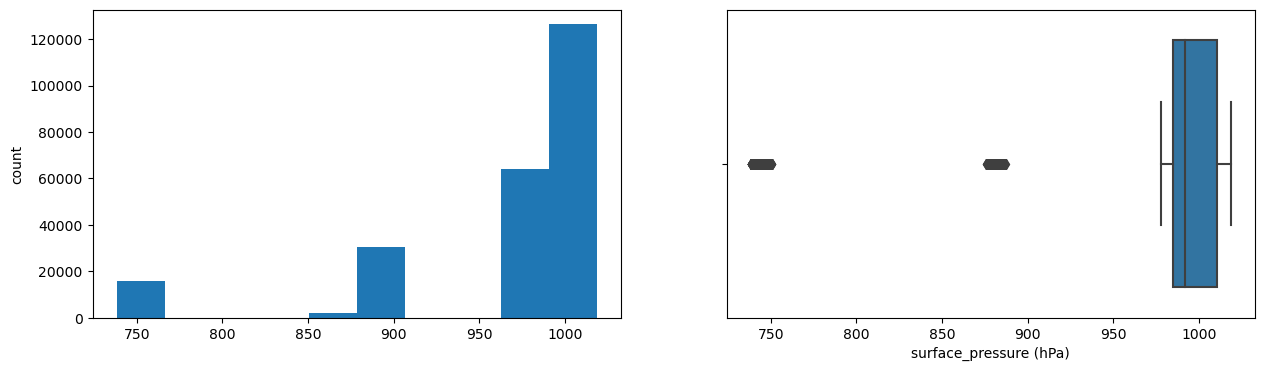

snowfall (cm)
Skew : 0


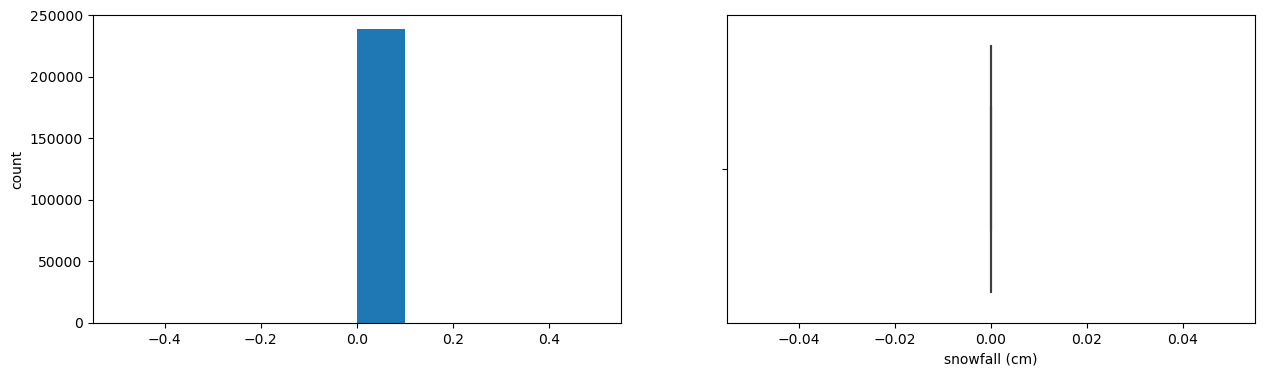

cloudcover (%)
Skew : 0.1


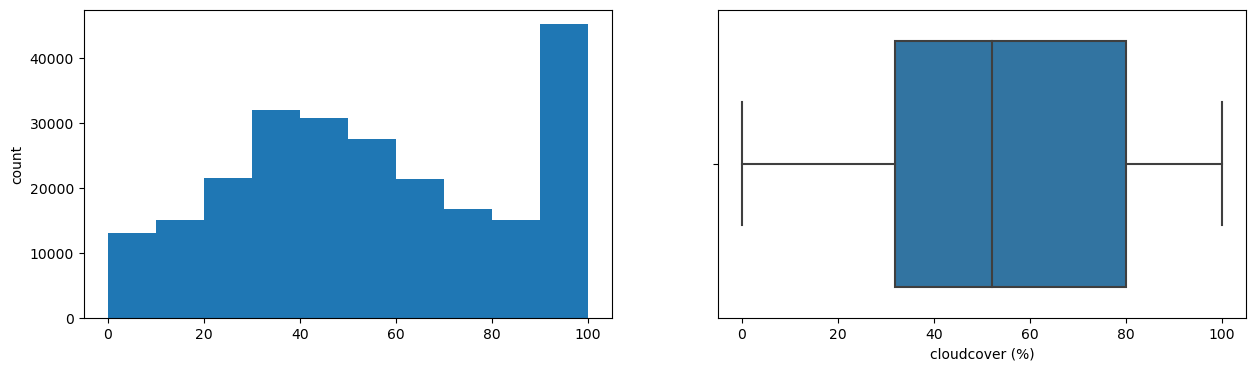

cloudcover_low (%)
Skew : 1.4


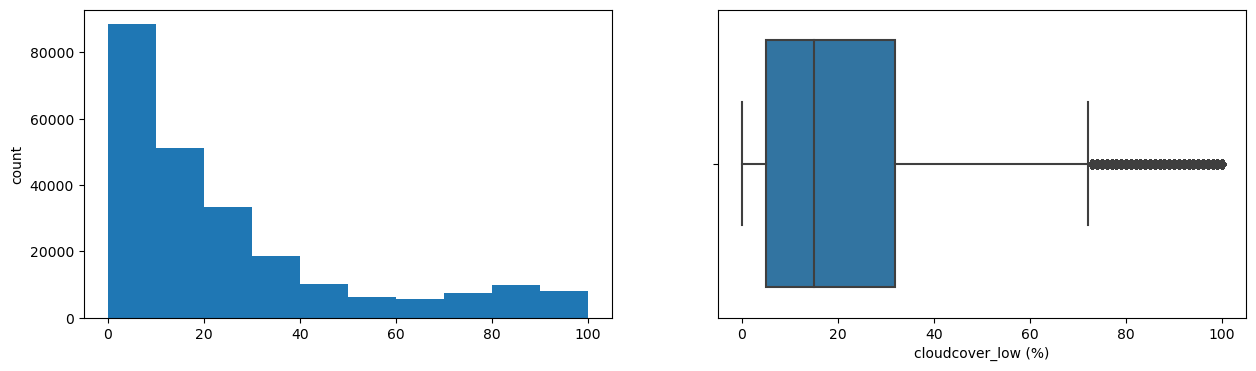

cloudcover_mid (%)
Skew : 1.16


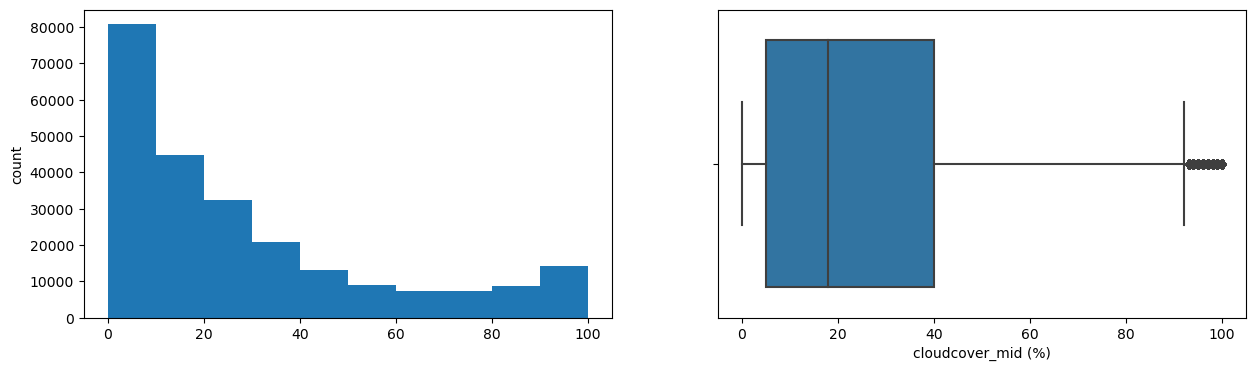

cloudcover_high (%)
Skew : -0.85


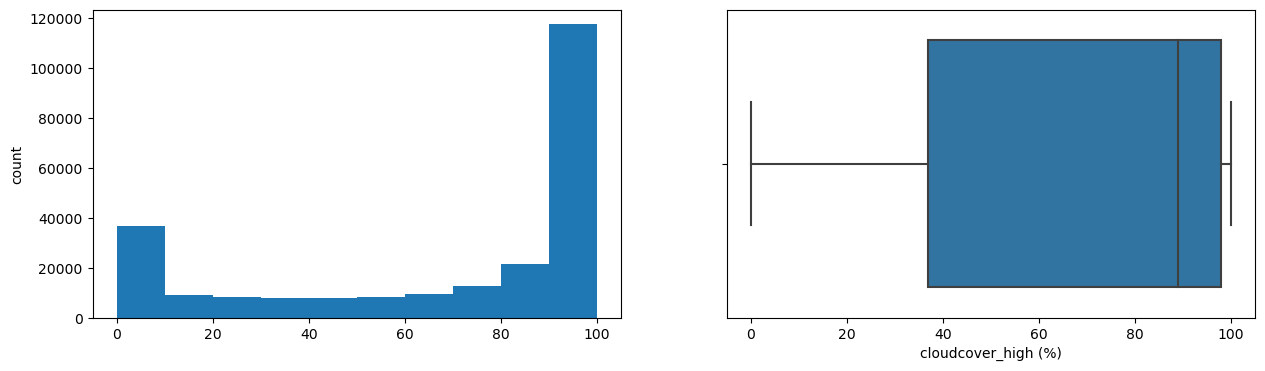

shortwave_radiation (W/m²)
Skew : 1.06


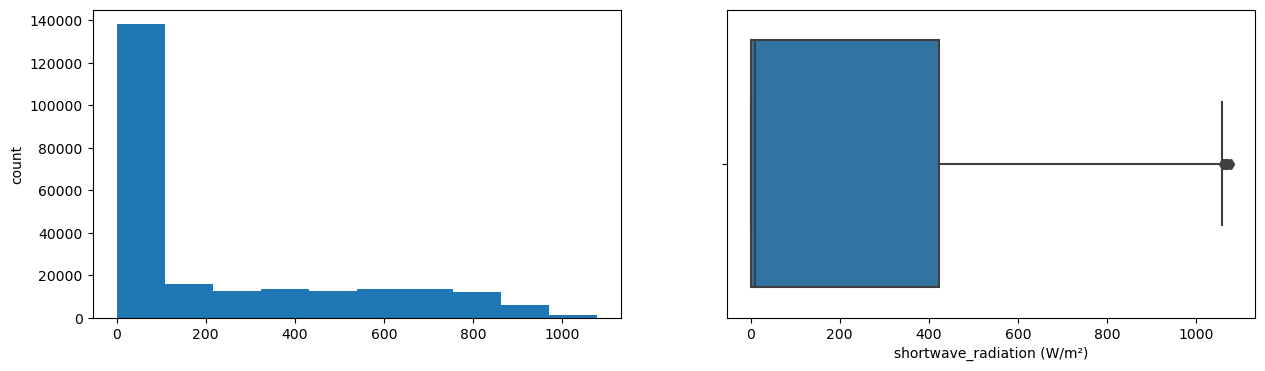

direct_radiation (W/m²)
Skew : 1.48


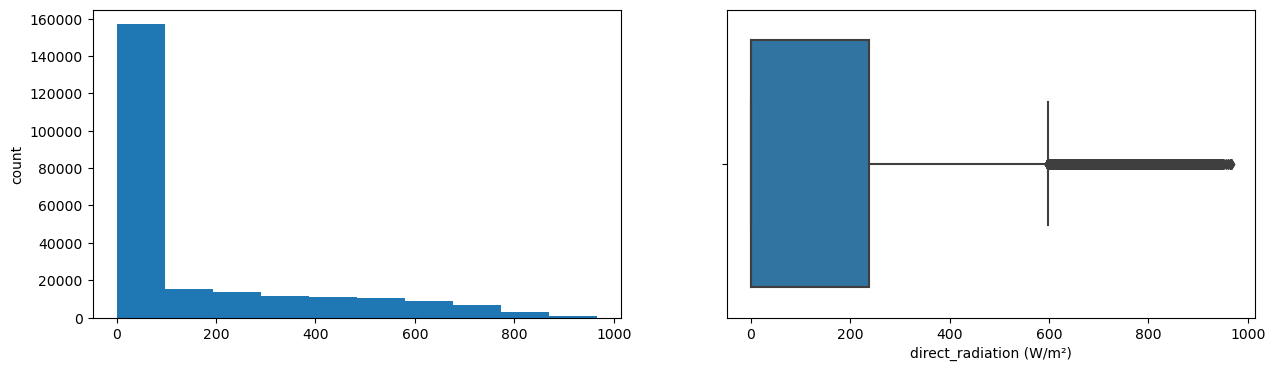

diffuse_radiation (W/m²)
Skew : 1.19


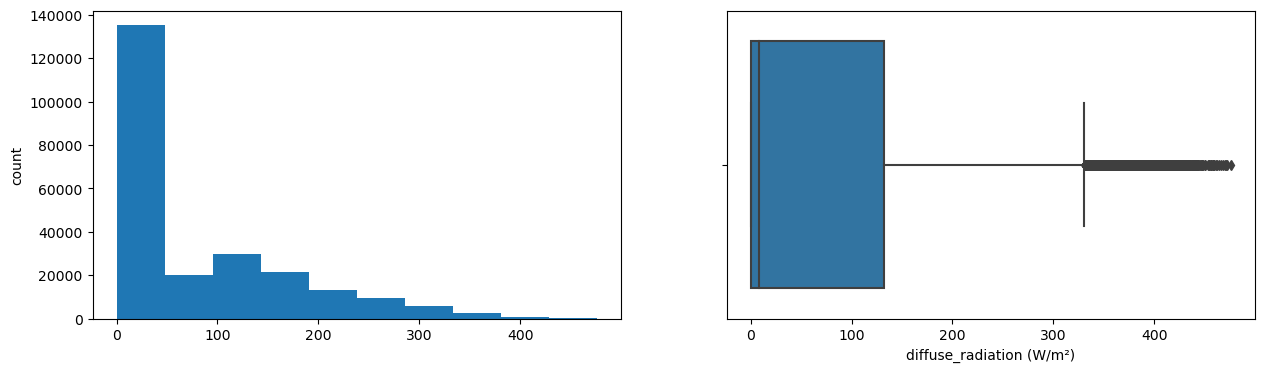

direct_normal_irradiance (W/m²)
Skew : 1.04


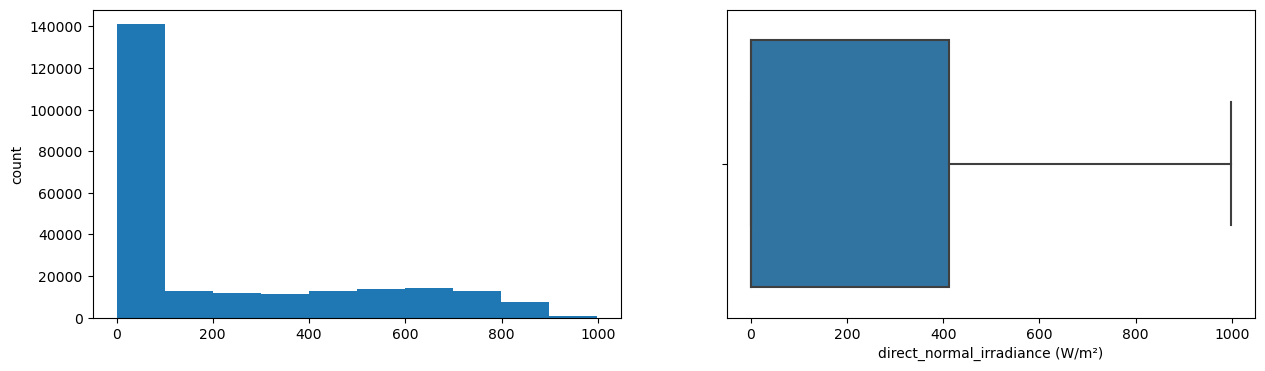

windspeed_10m (km/h)
Skew : 1.27


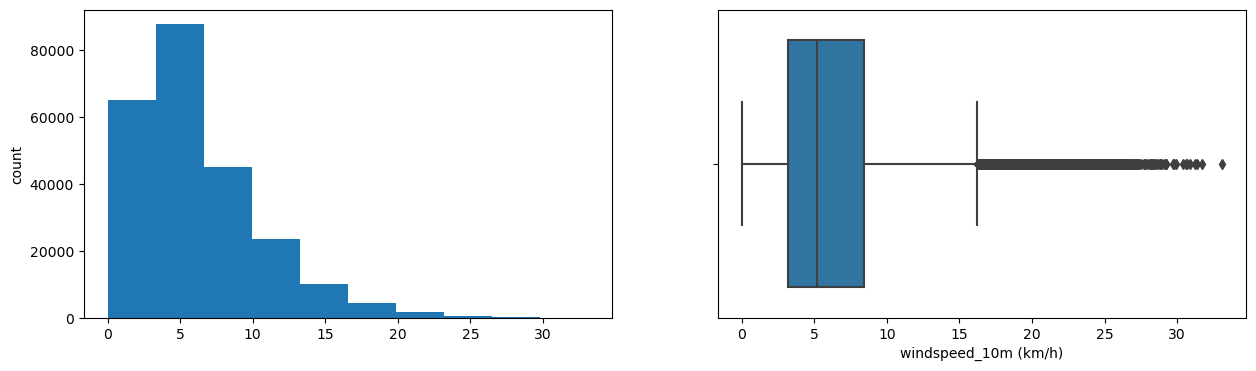

windspeed_100m (km/h)
Skew : 0.97


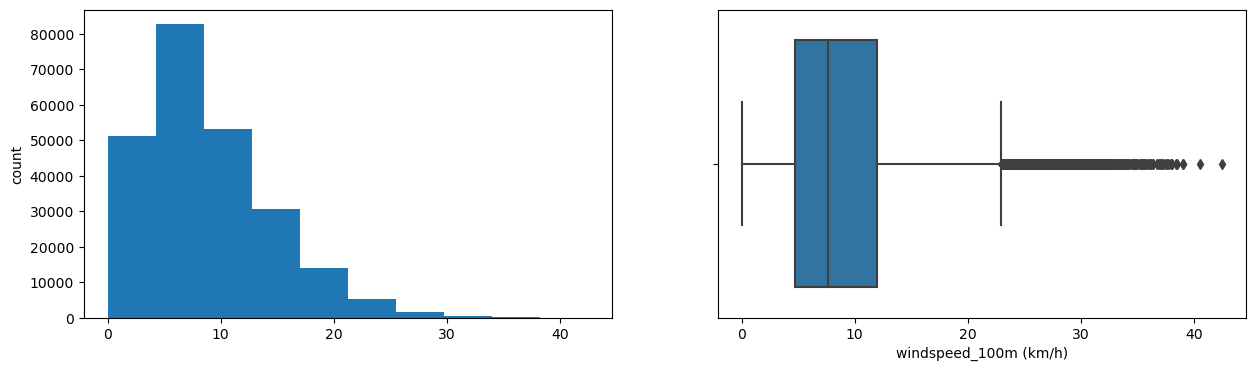

winddirection_10m (°)
Skew : 0.04


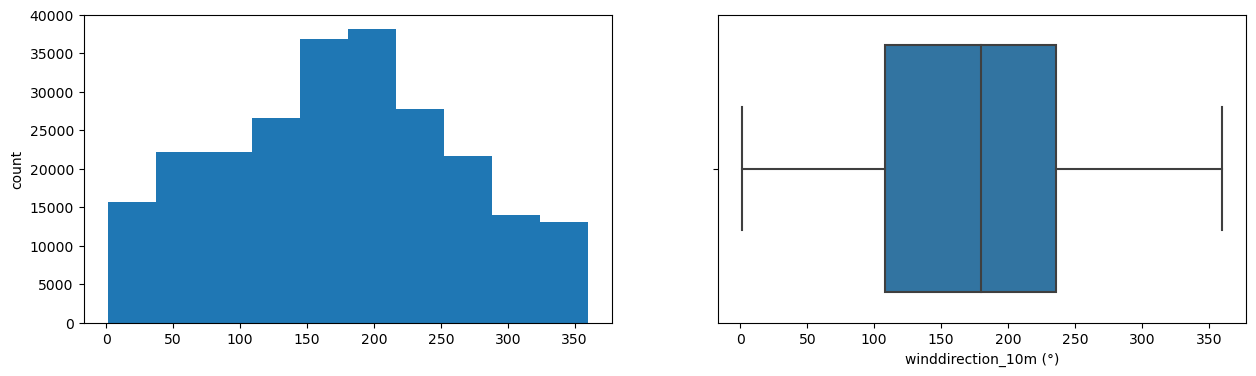

winddirection_100m (°)
Skew : 0.09


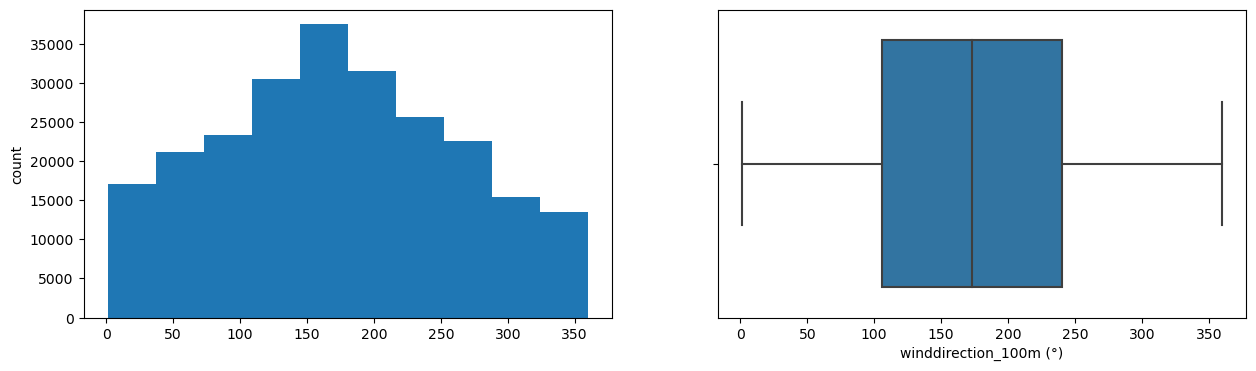

windgusts_10m (km/h)
Skew : 0.84


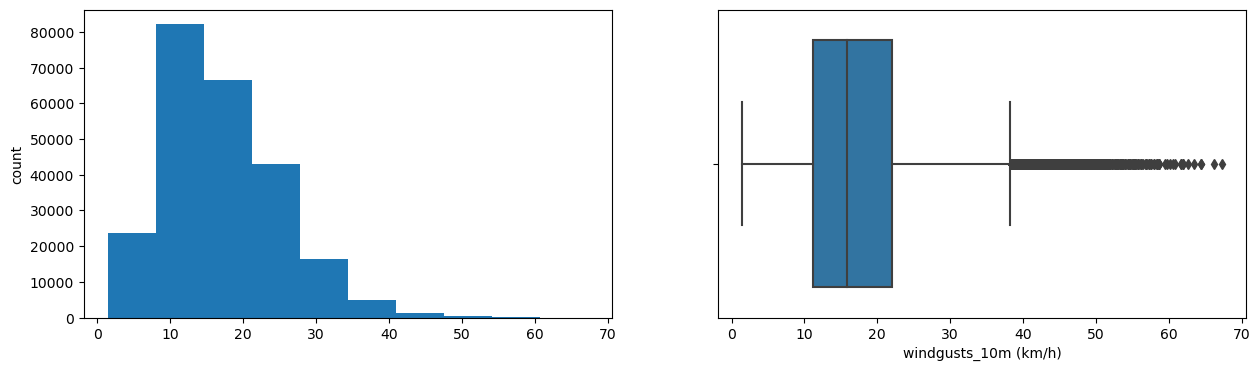

et0_fao_evapotranspiration (mm)
Skew : 1.11


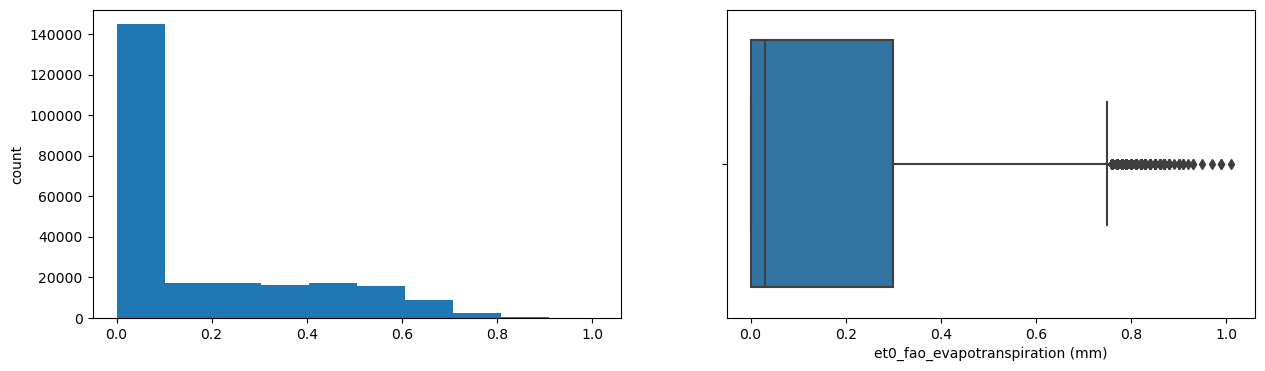

vapor_pressure_deficit (kPa)
Skew : 2.16


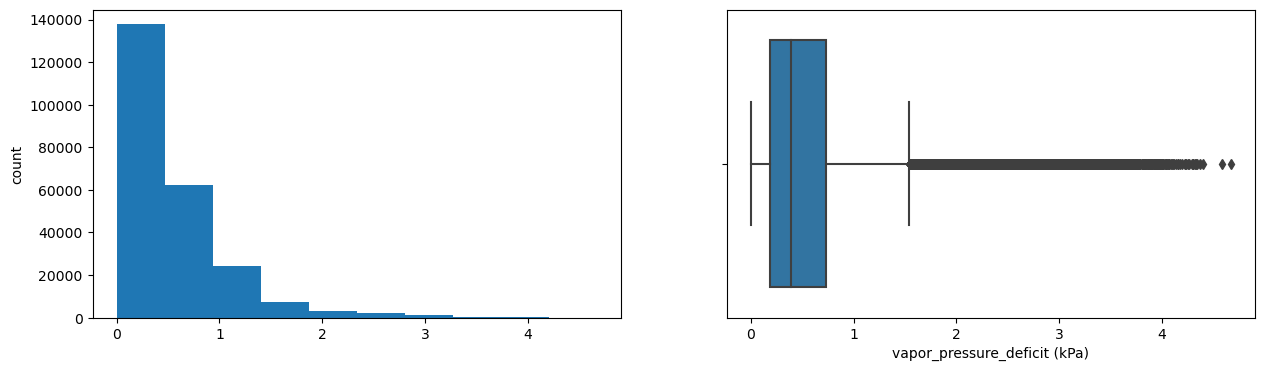

soil_temperature_0_to_7cm (°C)
Skew : -0.21


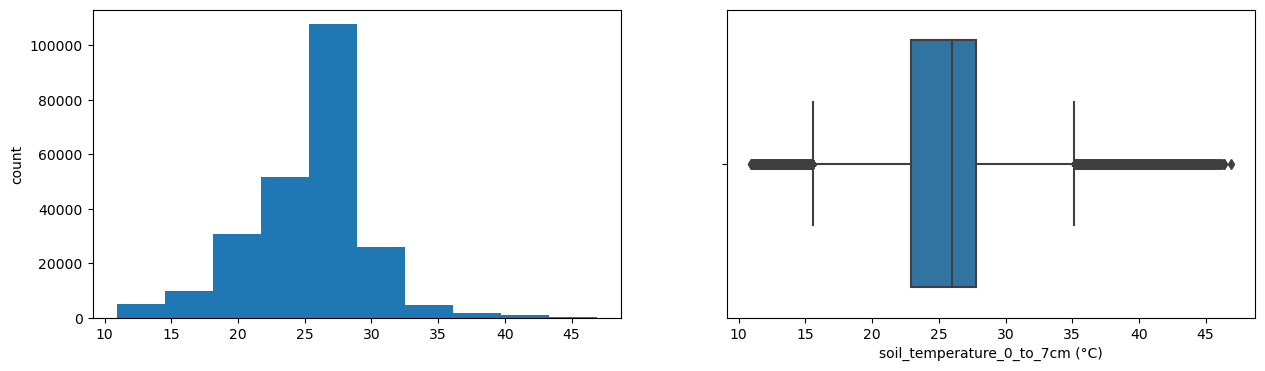

soil_temperature_7_to_28cm (°C)
Skew : -0.91


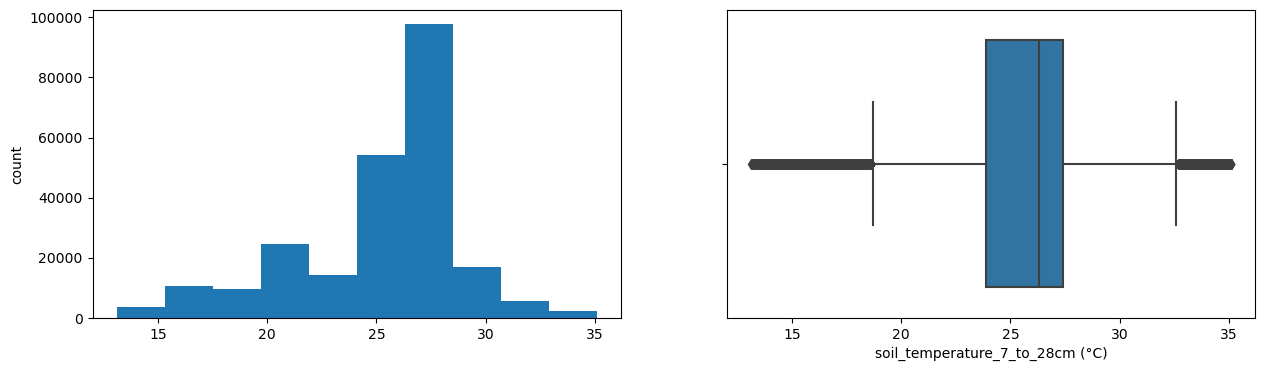

soil_temperature_28_to_100cm (°C)
Skew : -1.02


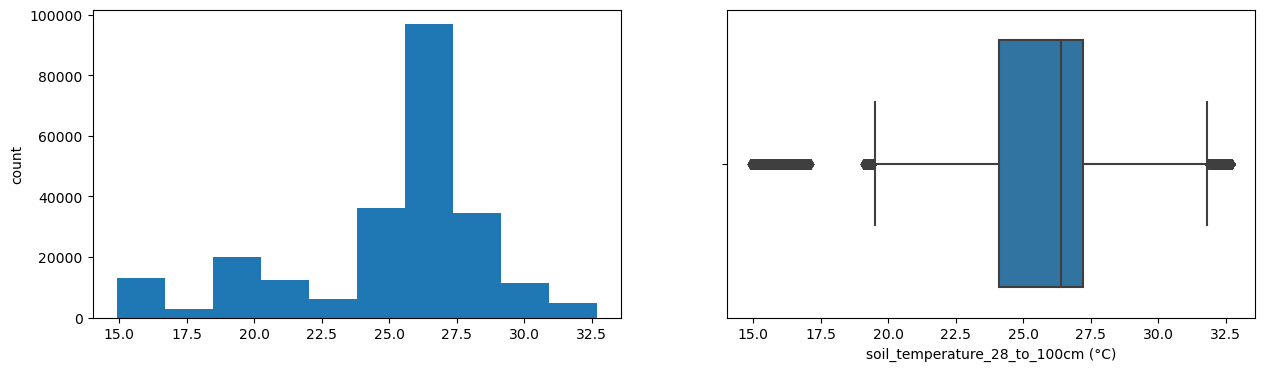

soil_temperature_100_to_255cm (°C)
Skew : -1.07


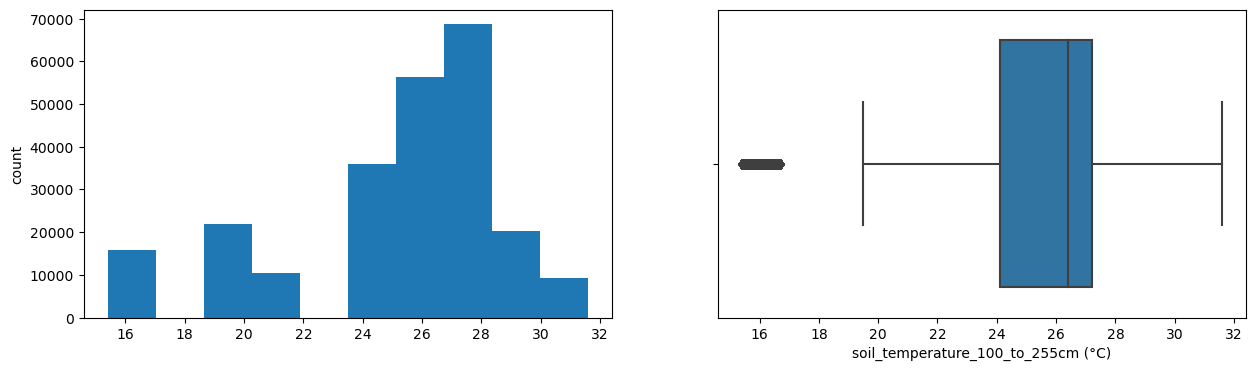

soil_moisture_0_to_7cm (m³/m³)
Skew : -0.71


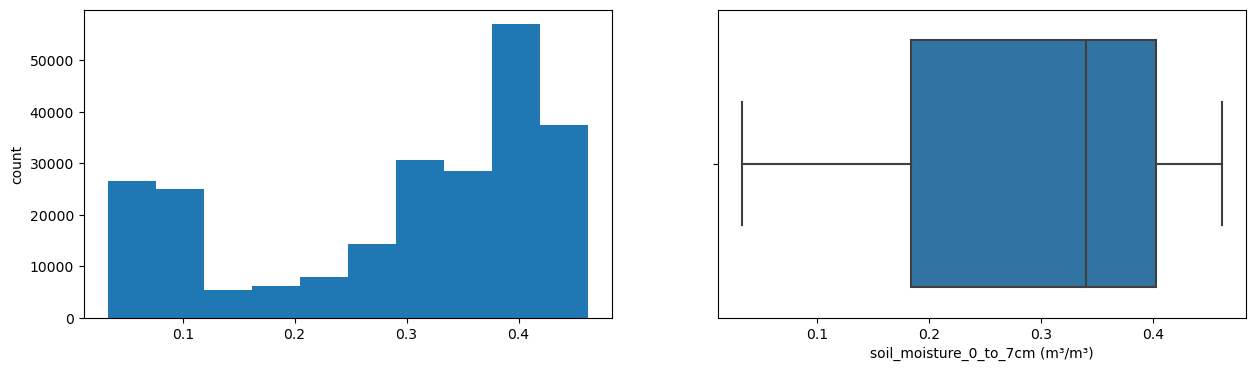

soil_moisture_7_to_28cm (m³/m³)
Skew : -0.68


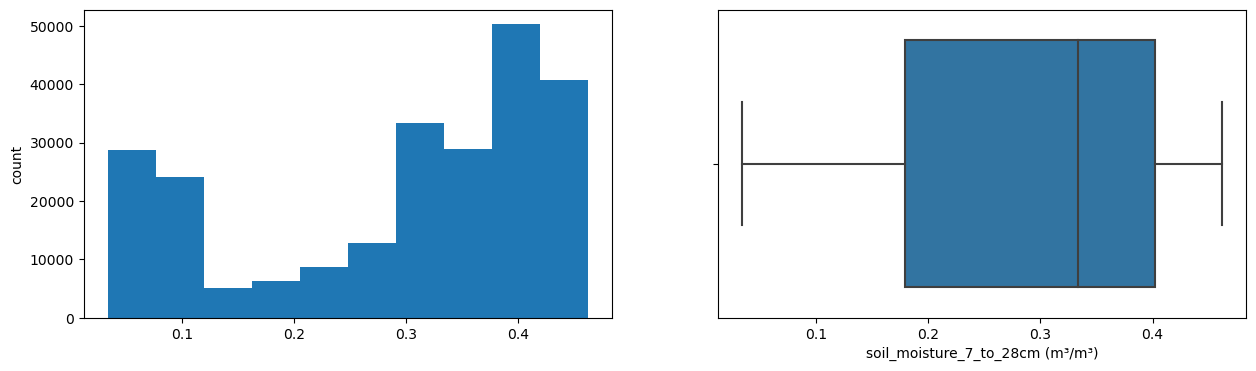

soil_moisture_28_to_100cm (m³/m³)
Skew : -0.61


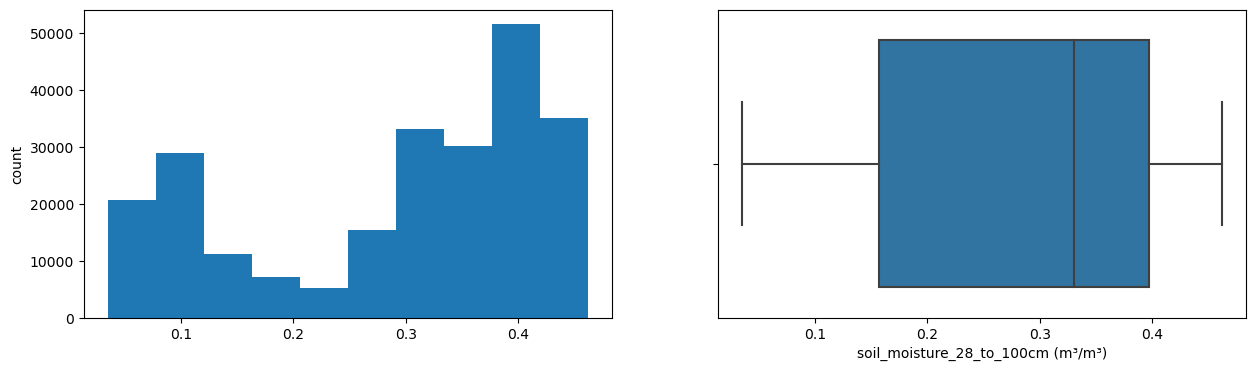

soil_moisture_100_to_255cm (m³/m³)
Skew : -0.9


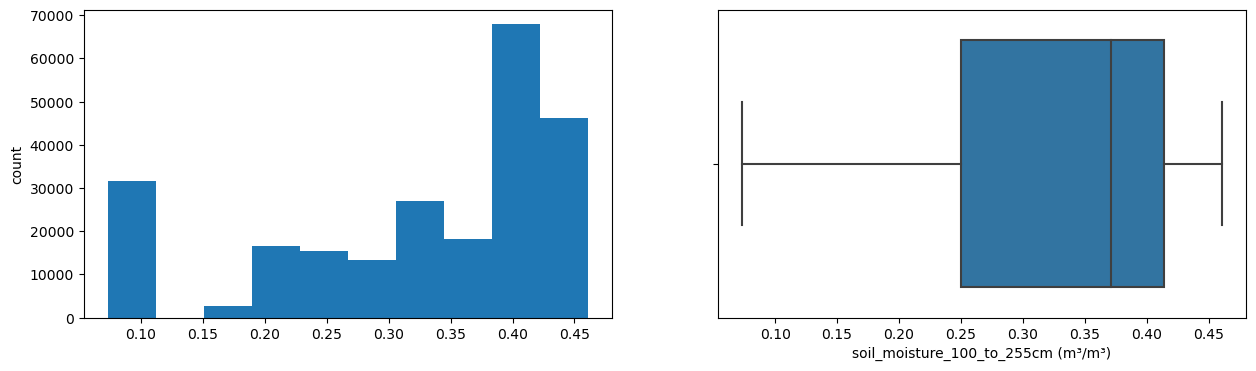

id
Skew : -0.0


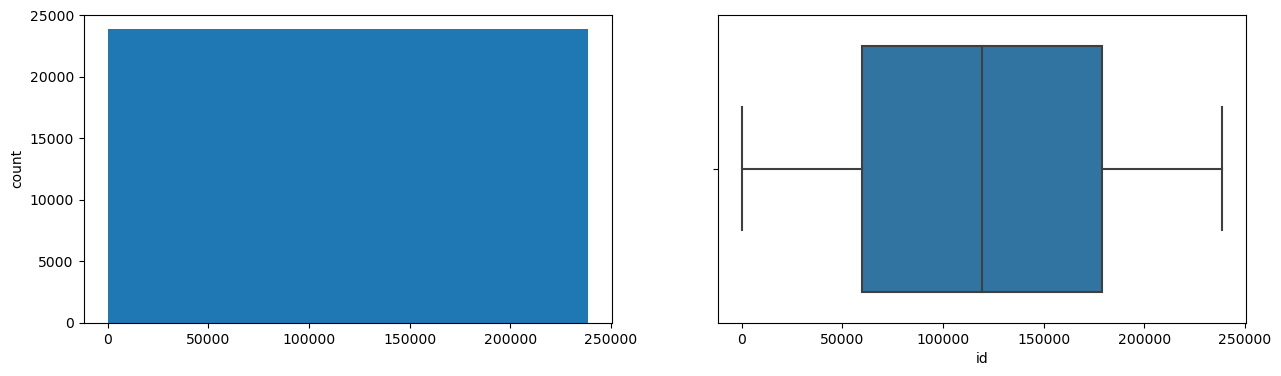

In [360]:
for col in num_cols:
    print(col)
    print('Skew :', round(train[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    train[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col])
    plt.show()

In [361]:

print("Total Snowfall Rows:")
print(train['snowfall (cm)'].count())
print("Total Snowfall = 0 Rows:")
train[train['snowfall (cm)'] == 0].count()

Total Snowfall Rows:
238525
Total Snowfall = 0 Rows:


time                                  238525
temperature_2m (°C)                   238525
relativehumidity_2m (%)               238525
dewpoint_2m (°C)                      238525
apparent_temperature (°C)             238525
pressure_msl (hPa)                    238525
surface_pressure (hPa)                238525
snowfall (cm)                         238525
cloudcover (%)                        238525
cloudcover_low (%)                    238525
cloudcover_mid (%)                    238525
cloudcover_high (%)                   238525
shortwave_radiation (W/m²)            238525
direct_radiation (W/m²)               238525
diffuse_radiation (W/m²)              238525
direct_normal_irradiance (W/m²)       238525
windspeed_10m (km/h)                  238525
windspeed_100m (km/h)                 238525
winddirection_10m (°)                 238193
winddirection_100m (°)                238384
windgusts_10m (km/h)                  238525
et0_fao_evapotranspiration (mm)       238525
vapor_pres

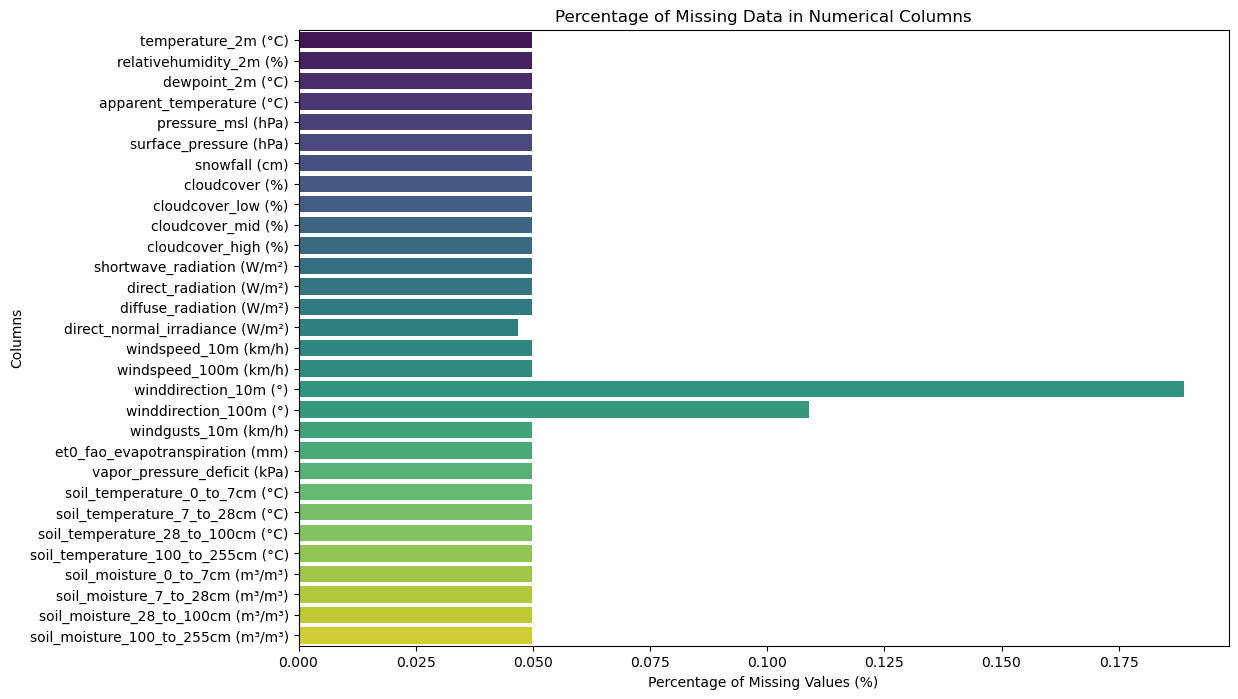

In [362]:

# List kolom numerikal
numerical_columns = num_cols
# Memeriksa missing values dan membuat dataframe untuk proporsi missing values
missing_data = train[numerical_columns].isnull().mean() * 100
missing_data = missing_data[missing_data > 0]  # Hanya kolom yang memiliki missing values

# Plot dengan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data.values, y=missing_data.index, palette="viridis")
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Columns')
plt.title('Percentage of Missing Data in Numerical Columns')
plt.show()


## PreProcessing

In [363]:
train.drop(labels=['snowfall (cm)'],axis=1,inplace=True)

In [364]:
threshold = 90

# Menghitung persentase nilai NaN untuk setiap kolom
null_percentage = train.isnull().mean() * 100
print(null_percentage)

time                                  0.000000
temperature_2m (°C)                   0.049865
relativehumidity_2m (%)               0.049865
dewpoint_2m (°C)                      0.049865
apparent_temperature (°C)             0.049865
pressure_msl (hPa)                    0.049865
surface_pressure (hPa)                0.049865
cloudcover (%)                        0.049865
cloudcover_low (%)                    0.049865
cloudcover_mid (%)                    0.049865
cloudcover_high (%)                   0.049865
shortwave_radiation (W/m²)            0.049865
direct_radiation (W/m²)               0.049865
diffuse_radiation (W/m²)              0.049865
direct_normal_irradiance (W/m²)       0.046932
windspeed_10m (km/h)                  0.049865
windspeed_100m (km/h)                 0.049865
winddirection_10m (°)                 0.188984
winddirection_100m (°)                0.108949
windgusts_10m (km/h)                  0.049865
et0_fao_evapotranspiration (mm)       0.049865
vapor_pressur

In [365]:
threshold = 0.9

# Menghitung persentase nilai NaN di setiap baris
row_null_percentage = train.isna().mean(axis=1)

# Drop baris yang memiliki persentase NaN lebih dari 80%
data_cleaned = train[row_null_percentage <= threshold]
data_cleaned.isna().sum()

time                                    0
temperature_2m (°C)                     0
relativehumidity_2m (%)                 0
dewpoint_2m (°C)                        0
apparent_temperature (°C)               0
pressure_msl (hPa)                      0
surface_pressure (hPa)                  0
cloudcover (%)                          0
cloudcover_low (%)                      0
cloudcover_mid (%)                      0
cloudcover_high (%)                     0
shortwave_radiation (W/m²)              0
direct_radiation (W/m²)                 0
diffuse_radiation (W/m²)                0
direct_normal_irradiance (W/m²)         0
windspeed_10m (km/h)                    0
windspeed_100m (km/h)                   0
winddirection_10m (°)                 332
winddirection_100m (°)                141
windgusts_10m (km/h)                    0
et0_fao_evapotranspiration (mm)         0
vapor_pressure_deficit (kPa)            0
soil_temperature_0_to_7cm (°C)          0
soil_temperature_7_to_28cm (°C)   

In [366]:
train_cleaned = data_cleaned

In [367]:
train_cleaned[train_cleaned["winddirection_10m (°)"].isnull()][train_cleaned["winddirection_100m (°)"].isnull()].head()

C:\Users\asus\AppData\Local\Temp\ipykernel_41416\2093583874.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_cleaned[train_cleaned["winddirection_10m (°)"].isnull()][train_cleaned["winddirection_100m (°)"].isnull()].head()


,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city,id
3590,2018-05-28T08:00,28.2,82.0,24.8,34.6,1011.6,994.3,36.0,5.0,6.0,...,24.0,23.7,24.2,24.1,0.420,0.420,0.382,0.432,le,98600
17019,2021-04-15T08:00,26.9,81.0,23.4,32.2,1012.4,1014.7,27.0,1.0,2.0,...,28.1,27.5,28.3,28.1,0.263,0.267,0.258,0.300,su,28808
18114,2020-11-10T09:00,20.3,84.0,17.5,24.4,1015.4,883.3,57.0,23.0,13.0,...,20.4,19.4,19.9,20.2,0.405,0.418,0.426,0.422,b,215505
19940,2021-10-24T09:00,29.9,68.0,23.4,38.6,1011.8,1014.1,43.0,26.0,0.0,...,32.6,30.1,30.7,29.9,0.186,0.179,0.083,0.204,su,31449
28625,2020-04-07T12:00,23.2,67.0,16.8,28.2,1015.0,884.1,60.0,48.0,1.0,...,22.5,20.0,20.3,20.2,0.403,0.417,0.414,0.394,b,210300


In [368]:
# Mengganti string kosong atau spasi dengan NaN
train_cleaned["winddirection_10m (°)"] = train_cleaned["winddirection_10m (°)"].replace(["", " ", "None"], pd.NA)
train_cleaned["winddirection_100m (°)"] = train_cleaned["winddirection_100m (°)"].replace(["", " ", "None"], pd.NA)

# Lanjutkan proses drop seperti sebelumnya
train_cleaned = train_cleaned[~(train_cleaned["winddirection_10m (°)"].isna() & train_cleaned["winddirection_100m (°)"].isna())]

C:\Users\asus\AppData\Local\Temp\ipykernel_41416\2625019271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned["winddirection_10m (°)"] = train_cleaned["winddirection_10m (°)"].replace(["", " ", "None"], pd.NA)
C:\Users\asus\AppData\Local\Temp\ipykernel_41416\2625019271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned["winddirection_100m (°)"] = train_cleaned["winddirection_100m (°)"].replace(["", " ", "None"], pd.NA)


In [369]:
train_cleaned.isna().sum()

time                                    0
temperature_2m (°C)                     0
relativehumidity_2m (%)                 0
dewpoint_2m (°C)                        0
apparent_temperature (°C)               0
pressure_msl (hPa)                      0
surface_pressure (hPa)                  0
cloudcover (%)                          0
cloudcover_low (%)                      0
cloudcover_mid (%)                      0
cloudcover_high (%)                     0
shortwave_radiation (W/m²)              0
direct_radiation (W/m²)                 0
diffuse_radiation (W/m²)                0
direct_normal_irradiance (W/m²)         0
windspeed_10m (km/h)                    0
windspeed_100m (km/h)                   0
winddirection_10m (°)                 308
winddirection_100m (°)                117
windgusts_10m (km/h)                    0
et0_fao_evapotranspiration (mm)         0
vapor_pressure_deficit (kPa)            0
soil_temperature_0_to_7cm (°C)          0
soil_temperature_7_to_28cm (°C)   

In [370]:
# import pandas as pd
# from sklearn.impute import SimpleImputer

# # Misalkan train_cleaned sudah didefinisikan sebelumnya

# # Memisahkan kolom numerik dari kolom waktu
# numerical_cols = train_cleaned.select_dtypes(include=['float64', 'int64']).columns
# # Jika ada kolom waktu, bisa ditambahkan di sini jika ingin memfilter lebih spesifik
# # time_cols = ['your_time_column']  # Ganti dengan nama kolom waktu jika ada

# # Membuat imputer untuk mean
# mean_imputer = SimpleImputer(strategy='mean')

# # Melakukan imputasi hanya pada kolom numerik
# train_cleaned[numerical_cols] = mean_imputer.fit_transform(train_cleaned[numerical_cols])

# # Cek apakah ada nilai NaN yang tersisa setelah imputasi
# nan_counts = train_cleaned.isna().sum()
# print("Jumlah NaN setelah imputasi:")
# print(nan_counts)


In [371]:
train_cleaned.isnull().sum()

time                                    0
temperature_2m (°C)                     0
relativehumidity_2m (%)                 0
dewpoint_2m (°C)                        0
apparent_temperature (°C)               0
pressure_msl (hPa)                      0
surface_pressure (hPa)                  0
cloudcover (%)                          0
cloudcover_low (%)                      0
cloudcover_mid (%)                      0
cloudcover_high (%)                     0
shortwave_radiation (W/m²)              0
direct_radiation (W/m²)                 0
diffuse_radiation (W/m²)                0
direct_normal_irradiance (W/m²)         0
windspeed_10m (km/h)                    0
windspeed_100m (km/h)                   0
winddirection_10m (°)                 308
winddirection_100m (°)                117
windgusts_10m (km/h)                    0
et0_fao_evapotranspiration (mm)         0
vapor_pressure_deficit (kPa)            0
soil_temperature_0_to_7cm (°C)          0
soil_temperature_7_to_28cm (°C)   

In [372]:
# Mengubah kolom time menjadi tipe datetime
train_cleaned['time'] = pd.to_datetime(train_cleaned['time'])

# Memecah kolom time menjadi kolom terpisah
train_cleaned['year'] = train_cleaned['time'].dt.year
train_cleaned['month'] = train_cleaned['time'].dt.month
train_cleaned['day'] = train_cleaned['time'].dt.day
train_cleaned['hour'] = train_cleaned['time'].dt.hour
train_cleaned['minute'] = train_cleaned['time'].dt.minute
train_cleaned['second'] = train_cleaned['time'].dt.second

# Menggabungkan jam, menit, dan detik menjadi satu integer
# Menggunakan format jammenitdetik dalam bentuk integer
train_cleaned['time_int'] = train_cleaned['hour'] * 10000 + train_cleaned['minute'] * 100 + train_cleaned['second']

# Hapus kolom 'time' jika sudah tidak diperlukan
train_cleaned.drop(labels=['time','hour','minute','second'],axis=1,inplace=True)

# Menampilkan data hasil pemisahan
train_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 238501 entries, 0 to 238643
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temperature_2m (°C)                 238501 non-null  float64
 1   relativehumidity_2m (%)             238501 non-null  float64
 2   dewpoint_2m (°C)                    238501 non-null  float64
 3   apparent_temperature (°C)           238501 non-null  float64
 4   pressure_msl (hPa)                  238501 non-null  float64
 5   surface_pressure (hPa)              238501 non-null  float64
 6   cloudcover (%)                      238501 non-null  float64
 7   cloudcover_low (%)                  238501 non-null  float64
 8   cloudcover_mid (%)                  238501 non-null  float64
 9   cloudcover_high (%)                 238501 non-null  float64
 10  shortwave_radiation (W/m²)          238501 non-null  float64
 11  direct_radiation (W/m²)   

C:\Users\asus\AppData\Local\Temp\ipykernel_41416\2955070261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['time'] = pd.to_datetime(train_cleaned['time'])
C:\Users\asus\AppData\Local\Temp\ipykernel_41416\2955070261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['year'] = train_cleaned['time'].dt.year
C:\Users\asus\AppData\Local\Temp\ipykernel_41416\2955070261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [373]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encoding untuk kolom 'city'
label_encoder = LabelEncoder()
train_cleaned['city'] = label_encoder.fit_transform(train_cleaned['city'])

# Mendefinisikan fitur yang ingin dinormalisasi, kecuali 'apparent_temperature (°C)' dan 'city'
features_to_scale = train_cleaned.columns.difference(['city', 'apparent_temperature (°C)'])

# StandardScaler untuk normalisasi data
scaler = StandardScaler()

# Melakukan scaling hanya pada fitur numerikal yang terpilih
train_cleaned[features_to_scale] = scaler.fit_transform(train_cleaned[features_to_scale])

# Menampilkan hasi
train_cleaned.head()



C:\Users\asus\AppData\Local\Temp\ipykernel_41416\151297236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['city'] = label_encoder.fit_transform(train_cleaned['city'])
C:\Users\asus\AppData\Local\Temp\ipykernel_41416\151297236.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[features_to_scale] = scaler.fit_transform(train_cleaned[features_to_scale])


,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),...,soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city,id,year,month,day,time_int
0,0.816200,-0.651210,0.634688,33.7,-0.201395,0.597155,-0.172756,-0.427203,-0.372597,0.669068,...,0.689363,0.734264,0.828548,0.623405,3,0.161945,-1.205479,-0.042289,-1.676094,-0.360831
1,-0.018831,1.025919,0.582605,31.9,-1.062014,0.595778,-1.199592,-0.850297,0.016657,-1.731783,...,0.373976,0.412902,0.195548,0.658171,2,0.851295,0.655155,-0.927050,-0.084989,-1.083081
2,0.794789,-1.886990,-0.224678,34.4,0.846315,0.665994,0.717169,0.303596,0.405910,0.291406,...,0.043571,-0.050458,0.288182,0.805928,2,0.977158,1.585472,-0.927050,-0.539590,-0.071931
3,-0.018831,0.408029,0.244067,28.3,0.546969,0.279120,0.340662,0.919006,-0.974170,0.129551,...,-1.638492,-1.612428,-1.718891,-2.001453,7,-0.749156,-1.205479,-0.042289,1.506117,-1.516431
4,-2.630981,0.584569,-2.776734,12.8,1.968862,-3.071954,1.538638,2.188289,1.856763,0.399310,...,0.253829,0.308272,0.458011,0.127985,6,1.659148,-0.275162,-0.927050,1.733417,-1.227531


## PreProcessing - Test 2

In [374]:
test.drop(labels=['snowfall (cm)'],axis=1,inplace=True)

In [375]:
threshold = 90

# Menghitung persentase nilai NaN untuk setiap kolom
null_percentage = test.isnull().mean() * 100
print(null_percentage)

time                                  0.000000
temperature_2m (°C)                   0.064112
relativehumidity_2m (%)               0.064112
dewpoint_2m (°C)                      0.064112
pressure_msl (hPa)                    0.064112
surface_pressure (hPa)                0.064112
cloudcover (%)                        0.064112
cloudcover_low (%)                    0.064112
cloudcover_mid (%)                    0.064112
cloudcover_high (%)                   0.064112
shortwave_radiation (W/m²)            0.064112
direct_radiation (W/m²)               0.064112
diffuse_radiation (W/m²)              0.064112
direct_normal_irradiance (W/m²)       0.060341
windspeed_10m (km/h)                  0.064112
windspeed_100m (km/h)                 0.064112
winddirection_10m (°)                 0.189822
winddirection_100m (°)                0.109368
windgusts_10m (km/h)                  0.064112
et0_fao_evapotranspiration (mm)       0.064112
vapor_pressure_deficit (kPa)          0.064112
soil_temperat

In [376]:
# threshold = 0.8

# # Menghitung persentase nilai NaN di setiap baris
# row_null_percentage = test.isna().mean(axis=1)

# # Drop baris yang memiliki persentase NaN lebih dari 80%
# data_cleaned = test[row_null_percentage <= threshold]
# data_cleaned.isna().sum()

In [377]:
test_cleaned = test

In [378]:
# test_cleaned[test_cleaned["winddirection_10m (°)"].isnull()][test_cleaned["winddirection_100m (°)"].isnull()].head()

In [379]:
# # Mengganti string kosong atau spasi dengan NaN
# test_cleaned["winddirection_10m (°)"] = test_cleaned["winddirection_10m (°)"].replace(["", " ", "None"], pd.NA)
# test_cleaned["winddirection_100m (°)"] = test_cleaned["winddirection_100m (°)"].replace(["", " ", "None"], pd.NA)

# # Lanjutkan proses drop seperti sebelumnya
# test_cleaned = test_cleaned[~(test_cleaned["winddirection_10m (°)"].isna() & test_cleaned["winddirection_100m (°)"].isna())]

In [380]:
# test_cleaned.isna().sum()

In [381]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Mengambil data dari test_cleaned
test_data = test_cleaned.copy()

# Membuat imputer untuk mean berdasarkan train_cleaned
mean_imputer = SimpleImputer(strategy='mean')

# Melatih imputer pada data train_cleaned
mean_imputer.fit(train_cleaned)

# Melakukan imputasi pada test_data
for column in test_data.columns:
    if test_data[column].dtype in ['float64', 'int64']:  # Pastikan hanya untuk kolom numerik
        test_data[column] = mean_imputer.transform(test_data[[column]])

# Mengupdate test_cleaned dengan hasil imputasi
test_cleaned = test_data

# Cek apakah ada nilai NaN yang tersisa setelah imputasi pada data test
nan_counts_test = test_cleaned.isna().sum()
print("Jumlah NaN setelah imputasi pada data test:")
print(nan_counts_test)


In [382]:
test_cleaned.isnull().sum()

time                                    0
temperature_2m (°C)                    51
relativehumidity_2m (%)                51
dewpoint_2m (°C)                       51
pressure_msl (hPa)                     51
surface_pressure (hPa)                 51
cloudcover (%)                         51
cloudcover_low (%)                     51
cloudcover_mid (%)                     51
cloudcover_high (%)                    51
shortwave_radiation (W/m²)             51
direct_radiation (W/m²)                51
diffuse_radiation (W/m²)               51
direct_normal_irradiance (W/m²)        48
windspeed_10m (km/h)                   51
windspeed_100m (km/h)                  51
winddirection_10m (°)                 151
winddirection_100m (°)                 87
windgusts_10m (km/h)                   51
et0_fao_evapotranspiration (mm)        51
vapor_pressure_deficit (kPa)           51
soil_temperature_0_to_7cm (°C)         51
soil_temperature_7_to_28cm (°C)        51
soil_temperature_28_to_100cm (°C) 

In [383]:
# Mengubah kolom time menjadi tipe datetime
test_cleaned['time'] = pd.to_datetime(test_cleaned['time'])

# Memecah kolom time menjadi kolom terpisah
test_cleaned['year'] = test_cleaned['time'].dt.year
test_cleaned['month'] = test_cleaned['time'].dt.month
test_cleaned['day'] = test_cleaned['time'].dt.day
test_cleaned['hour'] = test_cleaned['time'].dt.hour
test_cleaned['minute'] = test_cleaned['time'].dt.minute
test_cleaned['second'] = test_cleaned['time'].dt.second

# Menggabungkan jam, menit, dan detik menjadi satu integer
# Menggunakan format jammenitdetik dalam bentuk integer
test_cleaned['time_int'] = test_cleaned['hour'] * 10000 + test_cleaned['minute'] * 100 + test_cleaned['second']

# Hapus kolom 'time' jika sudah tidak diperlukan
test_cleaned.drop(labels=['time','hour','minute','second'],axis=1,inplace=True)

# Menampilkan data hasil pemisahan
test_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79548 entries, 0 to 79547
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_2m (°C)                 79497 non-null  float64
 1   relativehumidity_2m (%)             79497 non-null  float64
 2   dewpoint_2m (°C)                    79497 non-null  float64
 3   pressure_msl (hPa)                  79497 non-null  float64
 4   surface_pressure (hPa)              79497 non-null  float64
 5   cloudcover (%)                      79497 non-null  float64
 6   cloudcover_low (%)                  79497 non-null  float64
 7   cloudcover_mid (%)                  79497 non-null  float64
 8   cloudcover_high (%)                 79497 non-null  float64
 9   shortwave_radiation (W/m²)          79497 non-null  float64
 10  direct_radiation (W/m²)             79497 non-null  float64
 11  diffuse_radiation (W/m²)            79497

In [384]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encoding untuk kolom 'city'
label_encoder = LabelEncoder()
test_cleaned['city'] = label_encoder.fit_transform(test_cleaned['city'])

# Mendefinisikan fitur yang ingin dinormalisasi, kecuali 'apparent_temperature (°C)' dan 'city'
features_to_scale = test_cleaned.columns.difference(['city'])

# StandardScaler untuk normalisasi data
scaler = StandardScaler()

# Melakukan scaling hanya pada fitur numerikal yang terpilih
test_cleaned[features_to_scale] = scaler.fit_transform(test_cleaned[features_to_scale])

# Menampilkan hasi
test_cleaned.head()



,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),...,soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city,id,year,month,day,time_int
0,-2.135447,-1.138070,-2.054807,-0.796702,0.255280,0.907958,1.493108,-0.590085,-0.772699,-0.676203,...,-1.805494,-1.774264,-1.152767,-1.159707,0,1.152066,0.427305,-1.216547,-1.563975,-1.516993
1,-0.273996,0.208240,-0.189870,-0.667549,0.615375,-1.425613,-1.166046,-0.511944,-0.933602,-0.676203,...,1.198387,1.485447,1.791255,0.978511,1,-0.180787,0.427305,-0.925452,-0.089437,0.938879
2,-0.084943,-0.648502,-0.189870,-1.489427,0.237424,1.020419,0.943935,1.519735,1.342024,-0.676203,...,-1.805494,-1.774264,-1.152767,-1.159707,0,1.047901,-0.502332,1.112211,1.044823,-0.361288
3,-1.539201,-0.893286,-1.496639,0.917501,0.405072,1.020419,1.579819,1.415547,-0.795685,-0.676203,...,-1.158504,-1.167478,-0.750478,-1.175429,0,0.763319,-0.502332,-1.507641,1.158249,-1.372529
4,0.773070,1.370962,0.939598,0.588750,-1.931085,1.020419,1.695435,-0.902651,0.997233,-0.676203,...,0.366543,0.201318,-0.201903,0.333901,2,-1.032529,2.286579,1.112211,-1.223697,1.083342


## Modeling

In [385]:
# Modeling using
"""
Change the code just if you need to
"""
train_x = train_cleaned.drop(columns=[TARGET])
train_y = train_cleaned[TARGET]

rfr = XGBRegressor()
rfr.fit(train_x, train_y)
# test_cleaned = test_cleaned.drop(columns=['id'])
predict = rfr.predict(test_cleaned)
submission[TARGET] = predict
submission.to_csv(SUBMISSION_FILE, index=False)

In [144]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

NameError: name 'y_test' is not defined